In [1]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(13337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from keras import callbacks
#from keras.utils import plot_model
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

Using TensorFlow backend.


In [0]:
Dataset = pd.read_csv('/content/Data2.csv')
Dataset = Dataset.sample(frac=1)

#t = Dataset.iloc[5800:-1,:].values
#Dataset = Dataset.iloc[0:5800,:].values

Data_X = Dataset.iloc[:,0:-1].values
Data_Y = Dataset.iloc[:,-1].values
Data_X,T,Data_Y,C = train_test_split(Data_X, Data_Y, test_size = 0.11)
#X,Val_X,Y,Val_C = train_test_split(Data_X, Data_Y, test_size = 0.25)


In [0]:
scaler = StandardScaler()
trainX = scaler.fit_transform(Data_X)

np.set_printoptions(precision=3)

testT = scaler.transform(T)
np.set_printoptions(precision=3)

#Val_X = scaler.transform(Val_X)
#np.set_printoptions(precision=3)

In [0]:
y_train = np.array(Data_Y)
y_test = np.array(C)
#y_val = np.array(Val_C)

X_train = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
X_test = np.reshape(testT, (testT.shape[0], 1, testT.shape[1]))
#X_val = np.reshape(Val_X, (Val_X.shape[0], 1, Val_X.shape[1]))
#X_train = trainX
#X_test = testT

In [18]:
batch_size = 30
model = Sequential()
model.add(LSTM(32,input_dim=57, return_sequences=True))  
model.add(Dropout(0.3))
'''model.add(LSTM(32, return_sequences=True))  
model.add(Dropout(0.1))'''
model.add(LSTM(32, return_sequences=True))  
model.add(Dropout(0.3))
model.add(LSTM(32, return_sequences=True))  
model.add(Dropout(0.3))
model.add(LSTM(32, return_sequences=False))  
model.add(Dropout(0.3))
'''model.add(Dense(500, activation='sigmoid', input_dim=57))
model.add(Dropout(0.1))
model.add(Dense(200, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.1))'''
model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(32, return_sequences=True, input_shape=(None, 57))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
from keras.optimizers import Adam
adam = Adam(0.0001)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="logs/5/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger('logs/5/training_set_iranalysis.csv',separator=',', append=False)

In [20]:
history=model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=250, validation_data=(X_test, y_test))
#history=model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=250)
loss, accuracy = model.evaluate(X_train, y_train)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
expected = y_train
predicted = model.predict_classes(X_train)
accuracy = accuracy_score(expected, predicted)
precision = precision_score(expected, predicted)
recall = recall_score(expected, predicted, average="binary")
f1 = f1_score(expected, predicted , average="binary")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 5691 samples, validate on 704 samples
Epoch 1/250
5691/5691 [==============================] - 5s 902us/step - loss: 0.6926 - acc: 0.5280 - val_loss: 0.6926 - val_acc: 0.4915
Epoch 2/250
5691/5691 [==============================] - 2s 287us/step - loss: 0.6881 - acc: 0.5423 - val_loss: 0.6824 - val_acc: 0.5440
Epoch 3/250
5691/5691 [==============================] - 2s 293us/step - loss: 0.6424 - acc: 0.7090 - val_loss: 0.6011 - val_acc: 0.7798
Epoch 4/250
5691/5691 [==============================] - 2s 286us/step - loss: 0.5191 - acc: 0.8116 - val_loss: 0.4643 - val_acc: 0.8580
Epoch 5/250
5691/5691 [==============================] - 2s 283us/step - loss: 0.4083 - acc: 0.8626 - val_loss: 0.3672 - val_acc: 0.8722
Epoch 6/250
5691/5691 [==============================] - 2s 271us/step - loss: 0.3431 - acc: 0.8807 - val_loss: 0.3167 - val_acc: 0.8807
Epoch 7/250
5691/5691 [==============================] - 2s 269us/step - loss: 0.3011 - acc: 0.8889 - val_loss: 0.2816 - val_acc: 0

In [21]:
print("")
print("Accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" % precision)
print("recall")
print("%.3f" %recall)
print("f-score")
print("%.3f" %f1)


Accuracy
0.999
precision
0.999
recall
0.999
f-score
0.999


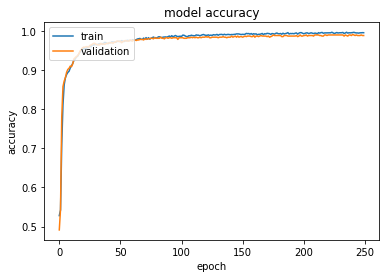

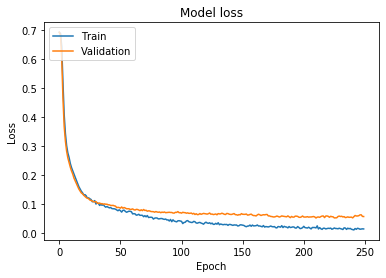

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('acc3.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('modelloss3.png')
plt.show()

In [23]:
confusion = metrics.confusion_matrix(y_train, predicted)
print(confusion)
TP = confusion[0, 0]
TN = confusion[1, 1]
FP = confusion[1, 0]
FN = confusion[0, 1]
sensitivity = TP / float(FN + TP)

print(sensitivity)

specificity = TN / (TN + FP)

print(specificity)

[[2645    2]
 [   4 3040]]
0.9992444276539478
0.9986859395532195


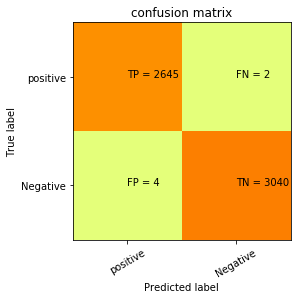

In [24]:
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['positive','Negative']
plt.title('confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=30)
plt.yticks(tick_marks, classNames)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion[i][j]))
plt.savefig('cm3.pdf')
plt.show()

In [0]:
Y.shape

(4060,)

In [0]:
print(y_train)

[0 1 0 ... 0 1 1]


In [0]:
predicted = model.predict_classes(X_test)

In [25]:
#X_t = t[:,0:-1]
#y_t = t[:,-1]
#scaler = StandardScaler()
#X_t = scaler.fit_transform(X_t)

np.set_printoptions(precision=3)

#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
expected = y_test
predicted = model.predict_classes(X_test)
accuracy = accuracy_score(expected, predicted)
precision = precision_score(expected, predicted)
recall = recall_score(expected, predicted, average="binary")
f1 = f1_score(expected, predicted , average="binary")

print("")
print("Accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" % precision)
print("recall")
print("%.3f" %recall)
print("f-score")
print("%.3f" %f1)


Accuracy
0.989
precision
0.988
recall
0.988
f-score
0.988


In [0]:
# Leave_one_out cross validation

from sklearn.model_selection import KFold

loo = LeaveOneOut()
loo.get_n_splits(Data_X)
scaler = StandardScaler()
trainX = scaler.fit_transform(Data_X)
np.set_printoptions(precision=3)

expected = []
predicted = []

batch_size = 30
model = Sequential()
model.add(LSTM(32,input_dim=57, return_sequences=True))  
model.add(Dropout(0.1))
'''model.add(LSTM(32, return_sequences=True))  
model.add(Dropout(0.1))'''
model.add(LSTM(32, return_sequences=True))  
model.add(Dropout(0.1))
model.add(LSTM(32, return_sequences=True))  
model.add(Dropout(0.1))
model.add(LSTM(32, return_sequences=False))  
model.add(Dropout(0.1))
'''model.add(Dense(500, activation='sigmoid', input_dim=57))
model.add(Dropout(0.1))
model.add(Dense(200, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.1))'''
model.add(Dense(1))
model.add(Activation('sigmoid'))

for train_index, test_index in loo.split(Data_X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = Data_X[train_index], Data_X[test_index]
    y_train, y_test = Data_Y[train_index], Data_Y[test_index]
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    checkpointer = callbacks.ModelCheckpoint(filepath="logs/5/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
    csv_logger = CSVLogger('logs/5/training_set_iranalysis.csv',separator=',', append=False)
    
    history=model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=20)
    loss, accuracy = model.evaluate(X_train, y_train)
    print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
    
    expected = np.append(expected, y_test)
    predicted = np.append(predicted, model.predict_classes(X_test))
    
    accuracy = accuracy_score(expected, predicted)
    precision = precision_score(expected, predicted)
    recall = recall_score(expected, predicted, average="binary")
    f1 = f1_score(expected, predicted , average="binary")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(32, return_sequences=True, input_shape=(None, 57))`
  app.launch_new_instance()


TRAIN: [   1    2    3 ... 6392 6393 6394] TEST: [0]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
6394/6394 [==============================] - 11s 2ms/step - loss: 0.4831 - acc: 0.7762
Epoch 2/20
6394/6394 [==============================] - 2s 287us/step - loss: 0.3029 - acc: 0.8764
Epoch 3/20
6394/6394 [==============================] - 2s 282us/step - loss: 0.2874 - acc: 0.8813
Epoch 4/20
6394/6394 [==============================] - 2s 274us/step - loss: 0.2597 - acc: 0.8938
Epoch 5/20
6394/6394 [==============================] - 2s 298us/step - loss: 0.2384 - acc: 0.9073
Epoch 6/20
6394/6394 [==============================] - 2s 288us/step - loss: 0.2157 - acc: 0.9124
Epoch 7/20
6394/6394 [==============================] - 2s 282us/step - loss: 0.2140 - acc: 0.9154
Epoch 8/20
6394/6394 [==============================] - 2s 297us/step - loss: 0.2112 - acc: 0.9138
Epoch 9/20
6394/6394 [==============================] - 2s 299us/step - loss: 0.2016 - acc: 0.9188
Epoch 10/20
6394/6394 [==============================] - 2s 276us/step - loss: 0.1942 - acc: 0.9232
Epoch 11/2

KeyboardInterrupt: 

In [0]:
from sklearn.model_selection import cross_val_score

batch_size = 30
model = Sequential()
model.add(LSTM(32,input_dim=57, return_sequences=True))  
model.add(Dropout(0.1))
'''model.add(LSTM(32, return_sequences=True))  
model.add(Dropout(0.1))'''
model.add(LSTM(32, return_sequences=True))  
model.add(Dropout(0.1))
model.add(LSTM(32, return_sequences=True))  
model.add(Dropout(0.1))
model.add(LSTM(32, return_sequences=False))  
model.add(Dropout(0.1))
'''model.add(Dense(500, activation='sigmoid', input_dim=57))
model.add(Dropout(0.1))
model.add(Dense(200, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.1))'''
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="logs/5/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger('logs/5/training_set_iranalysis.csv',separator=',', append=False)

cross_val_score(model, Data_X, Data_Y, cv=6395, scoring='accuracy')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(32, return_sequences=True, input_shape=(None, 57))`
  """


TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x000001C8C621B588>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [0]:
expected

array([0., 0., 1., 0., 0.])

In [0]:
predicted

array([0., 0., 1., 0., 0.])

In [0]:
accuracy = accuracy_score(expected, predicted)
precision = precision_score(expected, predicted)
recall = recall_score(expected, predicted, average="binary")
f1 = f1_score(expected, predicted , average="binary")


In [0]:
precision

1.0